### 0. 라이브러리 및 데이터 준비

In [134]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# 데이터 로드
raw = pd.read_csv('/Users/heojieun/python/AIFFEL/Dataton/sanfrancisco.csv')

In [136]:
# 복사해서 사용
data = raw.copy()

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


### 1. 전처리
###### 1) 시계열 데이터 추출

In [138]:
# 컬럼 생성
data['date_year'] = data['Dates'].apply(lambda x: x[:4])
data['date_month'] = data['Dates'].apply(lambda x: x[:7])
data['date_hour'] = data['Dates'].apply(lambda x: x[10:13])

###### 2) 기타 범죄

In [139]:
len(data[data['Category']=='OTHER OFFENSES'])

126182

제외하기로 결정함

In [140]:
# 행 삭제
indices = data[data['Category']=='OTHER OFFENSES'].index
data = data.drop(indices)

###### 3) 카테고리 재분류

In [141]:
def categorize(row, col='Category'):
    if (row[col]=='LARCENY/THEFT')|(row[col]=='VEHICLE THEFT')|(row[col]=='BURGLARY')|(row[col]=='STOLEN PROPERTY')|(row[col]=='STOLEN PROPERTY')|(row[col]=='EXTORTION'):
        return 'Property Crimes'
    elif (row[col]=='ASSAULT')|(row[col]=='KIDNAPPING')|(row[col]=='SEX OFFENSES FORCIBLE')|(row[col]=='ROBBERY')|(row[col]=='HOMICIDE')|(row[col]=='FAMILY OFFENSES')|(row[col]=='TRESPASS'):
        return 'Personal Crimes'
    elif (row[col]=='DRUNKENNESS')|(row[col]=='DRIVING UNDER THE INFLUENCE')|(row[col]=='LIQUOR LAWS'):
        return 'Alcohol-Related Crimes'
    elif (row[col]=='DISORDERLY CONDUCT')|(row[col]=='LOITERING'):
        return 'Disorderly Conduct'
    elif (row[col]=='FORGERY/COUNTERFEITING')|(row[col]=='FRAUD'):
        return 'Fraud and Forgery'
    elif row[col]=='WEAPON LAWS':
        return 'Weapon-Related Crimes'
    elif row[col]=='DRUG/NARCOTIC':
        return 'Drug-Related Crimes'
    elif (row[col]=='BAD CHECKS')|(row[col]=='EMBEZZLEMENT')|(row[col]=='BRIBERY'):
        return 'Financial Crimes'
    elif row[col]=='TREA':
        return 'Terrorist Offender'
    else:
        return 'Other Crimes'

In [142]:
data['new_category'] = data.apply(categorize, axis=1)

In [143]:
# 생성된 컬럼 값 확인
data['new_category'].value_counts()

Property Crimes           270232
Other Crimes              261536
Personal Crimes           114422
Drug-Related Crimes        53971
Fraud and Forgery          27288
Weapon-Related Crimes       8555
Alcohol-Related Crimes      8451
Disorderly Conduct          5545
Financial Crimes            1861
Terrorist Offender             6
Name: new_category, dtype: int64

In [144]:
# 컬럼 정리
columns = ['Dates', 'date_year', 'date_month', 'date_hour', 'DayOfWeek', 'Category', 'new_category', 'Descript', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']
data = data[columns]

In [145]:
data.head()

,Dates,date_year,date_month,date_hour,DayOfWeek,Category,new_category,Descript,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,2015,2015-05,23,Wednesday,WARRANTS,Other Crimes,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
3,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM UNLOCKED AUTO,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,VEHICLE THEFT,Property Crimes,STOLEN AUTOMOBILE,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751867 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Dates         751867 non-null  object 
 1   date_year     751867 non-null  object 
 2   date_month    751867 non-null  object 
 3   date_hour     751867 non-null  object 
 4   DayOfWeek     751867 non-null  object 
 5   Category      751867 non-null  object 
 6   new_category  751867 non-null  object 
 7   Descript      751867 non-null  object 
 8   PdDistrict    751867 non-null  object 
 9   Resolution    751867 non-null  object 
 10  Address       751867 non-null  object 
 11  X             751867 non-null  float64
 12  Y             751867 non-null  float64
dtypes: float64(2), object(11)
memory usage: 80.3+ MB


## EDA

In [147]:
# 각 연도별로 범죄건수 확인
san_year = data['date_year'].value_counts() 
san_year

2013    66176
2014    64476
2003    63288
2004    63098
2012    62109
2005    61931
2006    60546
2008    58314
2007    58256
2009    56956
2011    56681
2010    56078
2015    23958
Name: date_year, dtype: int64

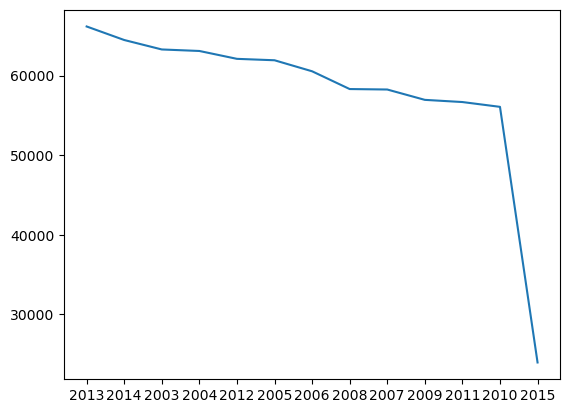

In [148]:
# 시각화하기 

plt.plot(san_year)
plt.show()

2015년에 범죄 발생률이 현저히 떨어졌다 왜일까? 

In [149]:
# 2015년과 그 전년도에서는 어떤 범죄가 일어났는지 살펴보기
data_2015 = data[data['date_year'] == '2015'] 
data_other = data[data['date_year'] != '2015']
data_other

,Dates,date_year,date_month,date_hour,DayOfWeek,Category,new_category,Descript,PdDistrict,Resolution,Address,X,Y
27584,2014-12-28 23:30:00,2014,2014-12,23,Sunday,LARCENY/THEFT,Property Crimes,GRAND THEFT PICKPOCKET,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801
27585,2014-12-28 23:30:00,2014,2014-12,23,Sunday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037
27586,2014-12-28 23:30:00,2014,2014-12,23,Sunday,VEHICLE THEFT,Property Crimes,STOLEN AUTOMOBILE,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834
27587,2014-12-28 23:30:00,2014,2014-12,23,Sunday,ASSAULT,Personal Crimes,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641
27588,2014-12-28 23:30:00,2014,2014-12,23,Sunday,ASSAULT,Personal Crimes,INFLICT INJURY ON COHABITEE,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,2003,2003-01,00,Monday,ROBBERY,Personal Crimes,ROBBERY ON THE STREET WITH A GUN,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,2003,2003-01,00,Monday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,2003,2003-01,00,Monday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,2003,2003-01,00,Monday,VANDALISM,Other Crimes,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


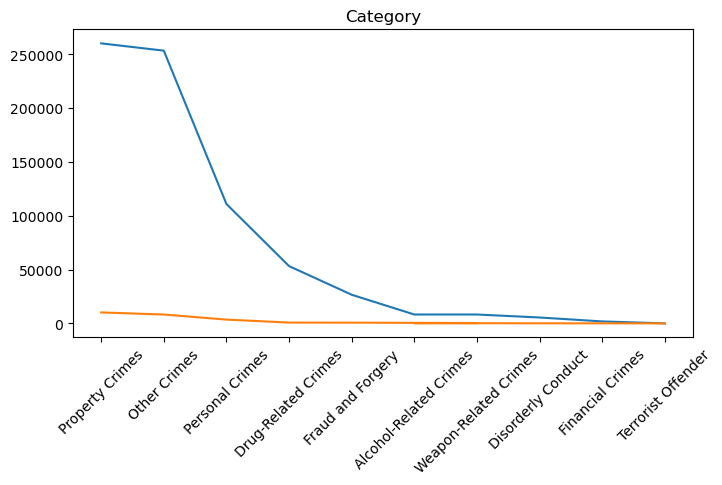

In [150]:
# 시각화하기 

plt.figure(figsize=(8, 4))

Category_other = data_other['new_category'].value_counts()

plt.plot(Category_other)
plt.xticks(rotation = 45)


Category_2015 = data_2015['new_category'].value_counts()

plt.plot(Category_2015)
plt.xticks(rotation = 45)
plt.title('Category')

plt.show()



In [151]:
# 2015년 데이터에 모두 기록이 되었는지 살펴보기
data_2015['date_month'].value_counts()

# 2015년의 데이터가 낮았던 이유는 5월까지만 데이터가 취합되어 있기 때문

2015-03    5956
2015-04    5758
2015-02    5198
2015-01    5057
2015-05    1989
Name: date_month, dtype: int64

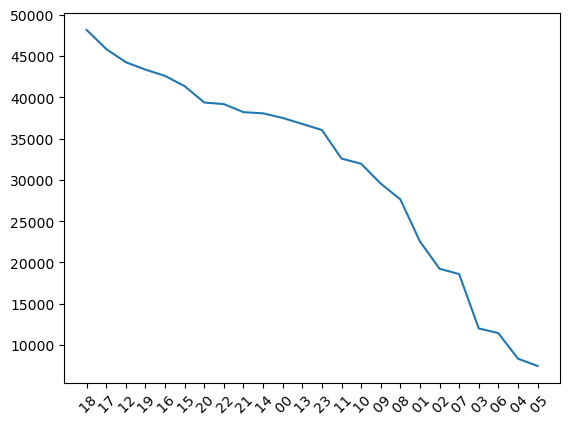

In [152]:
san_data_hour = data['date_hour'].value_counts()

plt.plot(san_data_hour)
plt.xticks(rotation = 45)
plt.show()

저녁 6시에 제일 많이 범죄가 일어나는 것을 알 수 있다. 왜 일까?

In [153]:
data_18 = data[data['date_hour'] == ' 18']
data_18

,Dates,date_year,date_month,date_hour,DayOfWeek,Category,new_category,Descript,PdDistrict,Resolution,Address,X,Y
75,2015-05-13 18:58:00,2015,2015-05,18,Wednesday,WARRANTS,Other Crimes,ENROUTE TO OUTSIDE JURISDICTION,MISSION,NONE,1900 Block of MISSION ST,-122.419677,37.765851
76,2015-05-13 18:58:00,2015,2015-05,18,Wednesday,WARRANTS,Other Crimes,WARRANT ARREST,MISSION,NONE,1900 Block of MISSION ST,-122.419677,37.765851
77,2015-05-13 18:55:00,2015,2015-05,18,Wednesday,NON-CRIMINAL,Other Crimes,"AIDED CASE, MENTAL DISTURBED",PARK,PSYCHOPATHIC CASE,4600 Block of 18TH ST,-122.442496,37.760486
78,2015-05-13 18:45:00,2015,2015-05,18,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,SOUTHERN,NONE,0 Block of FREELON ST,-122.396411,37.779188
80,2015-05-13 18:45:00,2015,2015-05,18,Wednesday,NON-CRIMINAL,Other Crimes,LOST PROPERTY,CENTRAL,NONE,PACIFIC AV / SANSOME ST,-122.402043,37.797505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877778,2003-01-06 18:00:00,2003,2003-01,18,Monday,VEHICLE THEFT,Property Crimes,STOLEN AUTOMOBILE,NORTHERN,NONE,POST ST / STEINER ST,-122.434733,37.784944
877779,2003-01-06 18:00:00,2003,2003-01,18,Monday,LARCENY/THEFT,Property Crimes,PETTY THEFT FROM LOCKED AUTO,TARAVAL,NONE,200 Block of WINSTON DR,-122.477894,37.727110
877780,2003-01-06 18:00:00,2003,2003-01,18,Monday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,CENTRAL,NONE,FRANCISCO ST / MONTGOMERY ST,-122.405361,37.805695
877781,2003-01-06 18:00:00,2003,2003-01,18,Monday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,CENTRAL,NONE,CHESTNUT ST / MONTGOMERY ST,-122.405178,37.804764


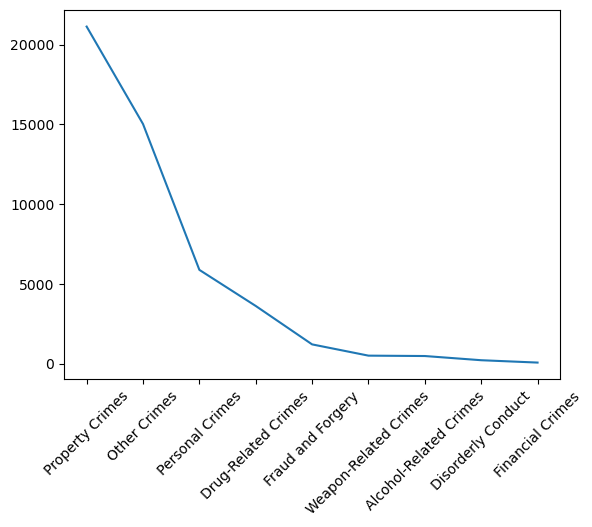

In [154]:
# 시각화하기
data_18_cate = data_18['new_category'].value_counts()
plt.plot(data_18_cate)
plt.xticks(rotation = 45)
plt.show()
# data_18_cate

In [155]:
# len(data[data['date_year'])
data['date_year'].value_counts()

2013    66176
2014    64476
2003    63288
2004    63098
2012    62109
2005    61931
2006    60546
2008    58314
2007    58256
2009    56956
2011    56681
2010    56078
2015    23958
Name: date_year, dtype: int64

In [156]:
# len(data[data['new_category'] == 'Drug-Related Crimes'])
data['new_category'].value_counts()

Property Crimes           270232
Other Crimes              261536
Personal Crimes           114422
Drug-Related Crimes        53971
Fraud and Forgery          27288
Weapon-Related Crimes       8555
Alcohol-Related Crimes      8451
Disorderly Conduct          5545
Financial Crimes            1861
Terrorist Offender             6
Name: new_category, dtype: int64

1. **발생율이 높은 범죄 유형을 분석해서 방범 대책 강구** (다연, 지은)
    1. 마약 사건과 범죄 발생 사이의 관계
    
    마약사건과 다른사건들의 상관관계 분석
    
    - 마약사건과 다른사건들 사이에 상관관계가 존재하는지 분석합니다.
    - 두개의 범죄 유형 간의 연관성을 확인하기 위해 데이터를 분석하고, 시간에 따른 영향을 고려합니다.
    
    분석 방법:
    
    1. 샌프란시스코 데이터에서 마약사건과 다른사건들의 데이터를 추출합니다.
    2. 알맞은 통계 분석 방법을 사용하여 마약사건과 다른 사건변수 간의 상관관계를 계산합니다.
    3. 상관계수를 통해 두 변수 간의 관계의 강도와 방향성을 확인합니다.
    4. 시계열 분석을 통해 시간에 따른 영향을 분석합니다.
    
    분석 결과에 따라 마약사건과 절도사건 사이의 관계와 시간에 따른 영향을 파악하여 범죄 예방에 도움이 될 수 있는 인사이트를 도출할 수 있습니다.

In [157]:
# 센프란시스코에서 많이 일어나고 있는 범죄 유형 살펴보기 
data.head()

,Dates,date_year,date_month,date_hour,DayOfWeek,Category,new_category,Descript,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,2015,2015-05,23,Wednesday,WARRANTS,Other Crimes,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
3,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,LARCENY/THEFT,Property Crimes,GRAND THEFT FROM UNLOCKED AUTO,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,2015,2015-05,23,Wednesday,VEHICLE THEFT,Property Crimes,STOLEN AUTOMOBILE,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138


- Dates: 범죄 발생 시간
- Category: 범죄 카테고리
- new_category : 범죄 카테고리를 큰 범쥐로 분류
- Descript: 해당 사건에 대한 설명
- DayOfWeek: 사건이 발생한 요일
- PdDistrict: 관할 경찰서
- Resolution: 해결 방법
- Address: 범죄 장소
- X: 위도
- Y: 경도
- 해당 데이터를 토대

In [158]:
# 각 유형별 범죄사건 개수 확인 
data['new_category'].value_counts()

Property Crimes           270232
Other Crimes              261536
Personal Crimes           114422
Drug-Related Crimes        53971
Fraud and Forgery          27288
Weapon-Related Crimes       8555
Alcohol-Related Crimes      8451
Disorderly Conduct          5545
Financial Crimes            1861
Terrorist Offender             6
Name: new_category, dtype: int64

범죄가 많이 일어나는 순서로 유형을 살펴보면 Property Crimes, Other Crimes, Personal Crimes, Drug-Related Crimes, Fraud and Forgery 이렇게 5개가 가장 높은 것을 알 수 있다. 
이 5개의 세부 범죄 카테고리를 파악하고 시각화해보자. 

In [159]:
# 제일 사건개수가 많은 5개의 범죄유형의 세부 범죄 카테고리가 무엇인지 확인하기

# 각각의 카테고리를 불러오는 함수 
def dataCategory(new_category) :
    category_data = data[data['new_category'] == new_category ]
    return category_data

In [160]:
# 데이터 저장하기 

property_data = dataCategory('Property Crimes')
other_data = dataCategory('Other Crimes')
personal_data = dataCategory('Personal Crimes')
drug_data = dataCategory('Drug-Related Crimes')
fraud_data = dataCategory('Fraud and Forgery')

In [161]:
# shape 확인
print('property_data : ' ,property_data.shape ,end ='\n')
print('other_data : ' ,other_data.shape ,end ='\n')
print('personal_data : ' ,personal_data.shape ,end ='\n')
print('drug_data : ' ,drug_data.shape ,end ='\n')
print('fraud_data : ' ,fraud_data.shape)

property_data :  (270232, 13)
other_data :  (261536, 13)
personal_data :  (114422, 13)
drug_data :  (53971, 13)
fraud_data :  (27288, 13)


In [162]:
# 각 범죄별 카테고리 value_count

property_cate = property_data['Category'].value_counts()
other_cate = other_data['Category'].value_counts()
personal_cate = personal_data['Category'].value_counts()
drug_cate = drug_data['Category'].value_counts()
fraud_cate = fraud_data['Category'].value_counts()


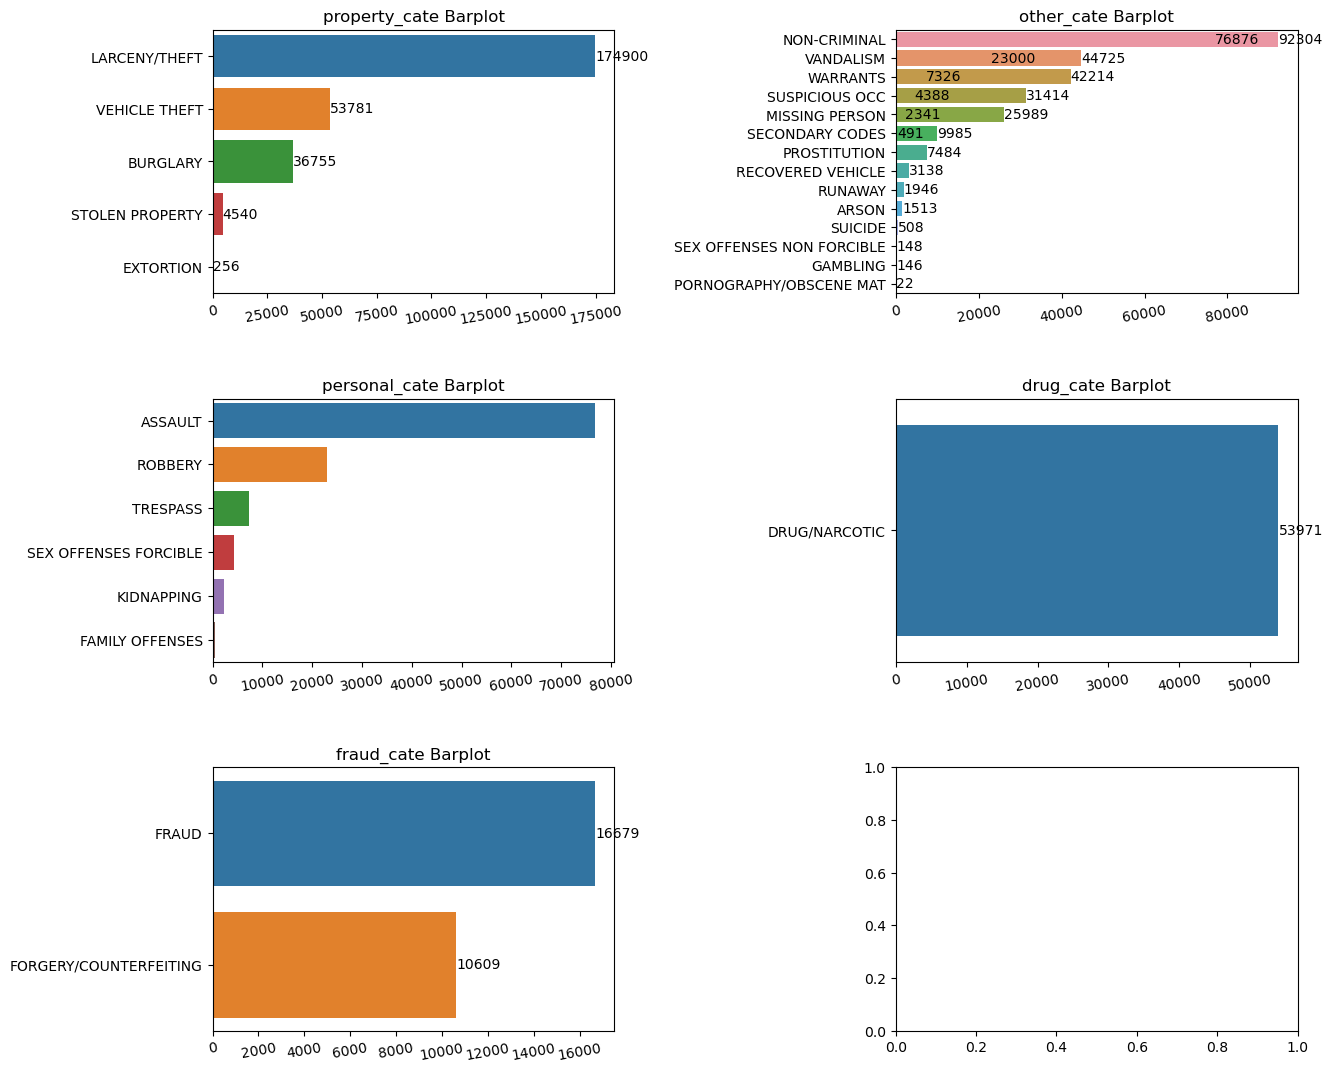

In [163]:
# 시각화하기 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 13))

# property_cate
ax1 = sns.barplot(x=property_cate.values, y=property_cate.index, ax=axes[0, 0])
# 각 막대 위에 값 표시
for container in ax1.containers:
    ax1.bar_label(container)
ax1.tick_params(axis='x', rotation=10)
ax1.set_title('property_cate Barplot')

# other_cate
ax2 = sns.barplot(x=other_cate.values, y=other_cate.index, ax=axes[0, 1])
# 각 막대 위에 값 표시
for container in ax2.containers:
    ax2.bar_label(container)
ax2.tick_params(axis='x', rotation=10)
ax2.set_title('other_cate Barplot')

# personal_cate
ax3 = sns.barplot(x=personal_cate.values, y=personal_cate.index, ax=axes[1, 0])
for container in ax3.containers:
    ax2.bar_label(container)
ax3.tick_params(axis='x', rotation=10)
ax3.set_title('personal_cate Barplot')
# drug_cate
ax4 = sns.barplot(x=drug_cate.values, y=drug_cate.index, ax=axes[1, 1])
for container in ax4.containers:
    ax4.bar_label(container)
ax4.tick_params(axis='x', rotation=10)
ax4.set_title('drug_cate Barplot')
# fraud_cate
ax5 = sns.barplot(x=fraud_cate.values, y=fraud_cate.index, ax=axes[2, 0])
for container in ax5.containers:
    ax5.bar_label(container)
ax5.tick_params(axis='x', rotation=10)
ax5.set_title('fraud_cate Barplot')

# 서브플롯 간의 가로 간격 및 세로 간격 설정
plt.subplots_adjust(wspace=0.7, hspace=0.4)
plt.show()

각각의 그래프를 확인해보면 
property_data는 
LLARCENY/THEFT : 174900, 
VEHICLE THEFT : 53781, 
BURGLARY : 36755, 
STOLEN PROPERTY : 4540, 

other_data는 
NON-CRIMINAL : 92304, 
VANDALISM : 44725, 
WARRANTS : 42214
SUSPICIOUS OCC : 31414, 
MISSING PERSON : 25989, 

personal_data는
ASSAULT : 76876, 
ROBBERY  : 23000, 
TRESPASS : 7326, 
SEX OFFENSES FORCIBLE : 4388, 
KIDNAPPING : 341, 

drug_data는 DRUG/NARCOTIC : 53971
fraud_data는 FRAUD : 16679, 
FORGERY/COUNTERFEITING : 10609인것을 알 수 있다. 

#### 이 중에서 우리는 최근 문제가 되고 있는 마약사건에 대해 분석해보고 마약사건과 상관관계가 있는 범죄유형을 도출하고자 한다

## 1. 샌프란시스코 데이터에서 마약사건과 다른사건들의 데이터를 추출하고 분석하기

In [164]:
# 샌프란시스코 데이터에서 마약사건 데이터를 추출합니다.
drug_data.head(10)


,Dates,date_year,date_month,date_hour,DayOfWeek,Category,new_category,Descript,PdDistrict,Resolution,Address,X,Y
107,2015-05-13 17:47:00,2015,2015-05,17,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF NARCOTICS PARAPHERNALIA,BAYVIEW,NONE,0 Block of WHITFIELD CT,-122.381838,37.731104
125,2015-05-13 17:12:00,2015,2015-05,17,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF MARIJUANA,SOUTHERN,"ARREST, BOOKED",6TH ST / NATOMA ST,-122.407693,37.780163
184,2015-05-13 14:31:00,2015,2015-05,14,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF MARIJUANA FOR SALES,PARK,"ARREST, BOOKED",1600 Block of HAIGHT ST,-122.449123,37.769784
185,2015-05-13 14:31:00,2015,2015-05,14,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,SALE OF MARIJUANA,PARK,"ARREST, BOOKED",1600 Block of HAIGHT ST,-122.449123,37.769784
220,2015-05-13 13:19:00,2015,2015-05,13,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF NARCOTICS PARAPHERNALIA,MISSION,"ARREST, BOOKED",17TH ST / MISSION ST,-122.419516,37.763429
223,2015-05-13 13:19:00,2015,2015-05,13,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF METH-AMPHETAMINE,MISSION,"ARREST, BOOKED",17TH ST / MISSION ST,-122.419516,37.763429
269,2015-05-13 09:46:00,2015,2015-05,09,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF MARIJUANA,PARK,"ARREST, BOOKED",HAIGHT ST / STANYAN ST,-122.453535,37.769166
279,2015-05-13 09:30:00,2015,2015-05,09,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF NARCOTICS PARAPHERNALIA,TENDERLOIN,"ARREST, BOOKED",GOLDEN GATE AV / HYDE ST,-122.415508,37.781654
282,2015-05-13 09:00:00,2015,2015-05,09,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,LOITERING WHERE NARCOTICS ARE SOLD/USED,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / JONES ST,-122.412784,37.784866
324,2015-05-13 05:00:00,2015,2015-05,05,Wednesday,DRUG/NARCOTIC,Drug-Related Crimes,POSSESSION OF METH-AMPHETAMINE,NORTHERN,"ARREST, BOOKED",1300 Block of WEBSTER ST,-122.431046,37.783030


### a. 마약사건 분석하기

### ->  일자별 시계열 데이터와 일 평균 데이터 건수를 확인

In [165]:
# 일자별 시계열 데이터와 일 평균 데이터 건수를 확인

# data type 확인 
drug_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53971 entries, 107 to 877973
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dates         53971 non-null  object 
 1   date_year     53971 non-null  object 
 2   date_month    53971 non-null  object 
 3   date_hour     53971 non-null  object 
 4   DayOfWeek     53971 non-null  object 
 5   Category      53971 non-null  object 
 6   new_category  53971 non-null  object 
 7   Descript      53971 non-null  object 
 8   PdDistrict    53971 non-null  object 
 9   Resolution    53971 non-null  object 
 10  Address       53971 non-null  object 
 11  X             53971 non-null  float64
 12  Y             53971 non-null  float64
dtypes: float64(2), object(11)
memory usage: 5.8+ MB


In [166]:
# 날짜 데이터로 변환

drug_data['Dates'] = pd.to_datetime(drug_data['Dates'])
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53971 entries, 107 to 877973
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dates         53971 non-null  datetime64[ns]
 1   date_year     53971 non-null  object        
 2   date_month    53971 non-null  object        
 3   date_hour     53971 non-null  object        
 4   DayOfWeek     53971 non-null  object        
 5   Category      53971 non-null  object        
 6   new_category  53971 non-null  object        
 7   Descript      53971 non-null  object        
 8   PdDistrict    53971 non-null  object        
 9   Resolution    53971 non-null  object        
 10  Address       53971 non-null  object        
 11  X             53971 non-null  float64       
 12  Y             53971 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 5.8+ MB


/var/folders/p9/cdtrn_zs1t92xz8b_tlmwsy80000gn/T/ipykernel_1064/2768172086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data['Dates'] = pd.to_datetime(drug_data['Dates'])


In [167]:
drug_data['Date'] = drug_data.Dates.dt.date
drug_data['date_hour'] = drug_data.Dates.dt.hour
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53971 entries, 107 to 877973
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dates         53971 non-null  datetime64[ns]
 1   date_year     53971 non-null  object        
 2   date_month    53971 non-null  object        
 3   date_hour     53971 non-null  int64         
 4   DayOfWeek     53971 non-null  object        
 5   Category      53971 non-null  object        
 6   new_category  53971 non-null  object        
 7   Descript      53971 non-null  object        
 8   PdDistrict    53971 non-null  object        
 9   Resolution    53971 non-null  object        
 10  Address       53971 non-null  object        
 11  X             53971 non-null  float64       
 12  Y             53971 non-null  float64       
 13  Date          53971 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 6.2+ MB


/var/folders/p9/cdtrn_zs1t92xz8b_tlmwsy80000gn/T/ipykernel_1064/2404248138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data['Date'] = drug_data.Dates.dt.date
/var/folders/p9/cdtrn_zs1t92xz8b_tlmwsy80000gn/T/ipykernel_1064/2404248138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data['date_hour'] = drug_data.Dates.dt.hour


In [185]:
daily_drug_df = drug_data.groupby('Date').count().iloc[:, 0]
daily_drug_df


Date
2003-01-06    35
2003-01-07    36
2003-01-08    49
2003-01-09    30
2003-01-10    32
              ..
2015-05-02     7
2015-05-03     4
2015-05-11     9
2015-05-12    12
2015-05-13    10
Name: Dates, Length: 2248, dtype: int64

/var/folders/p9/cdtrn_zs1t92xz8b_tlmwsy80000gn/T/ipykernel_1064/4190135573.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = daily_drug_df, shade = True, ax = ax[1])


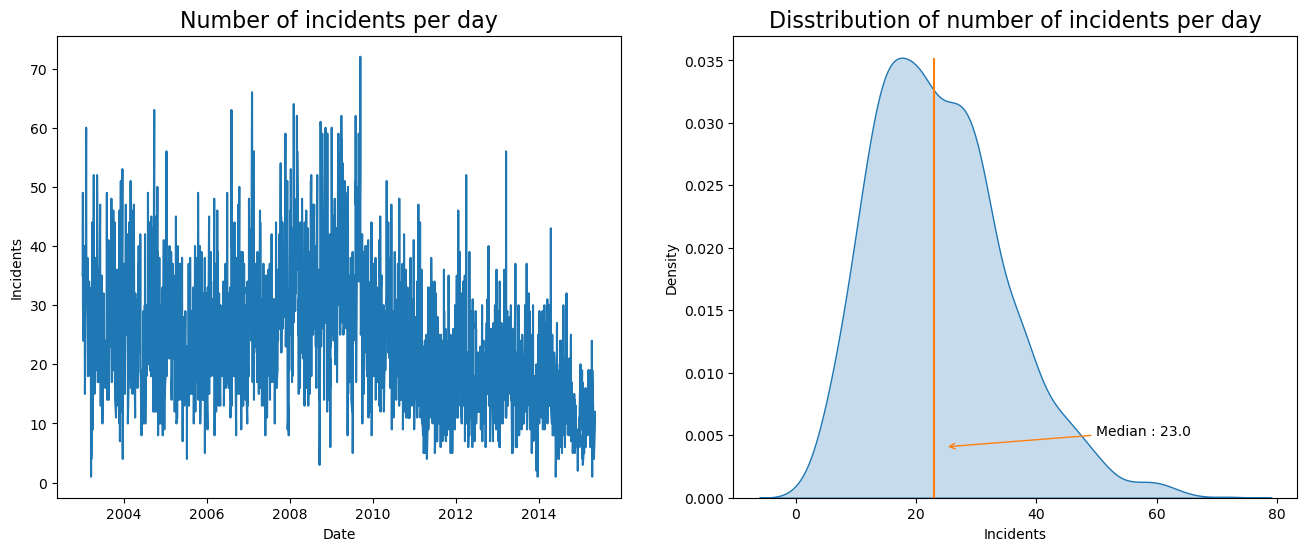

In [195]:
# 일자별 시계열 데이터와 일 평균 데이터 건수 확인

col = sns.color_palette()
fig, ax = plt.subplots(ncols = 2, figsize = (16, 6))

# 일자별 시계열 데이터
sns.lineplot(x = daily_drug_df.index, y = daily_drug_df.values, ax = ax[0])
ax[0].set_title(
    'Number of incidents per day', fontdict = {'fontsize' : 16})

ax[0].set_ylabel('Incidents')
# 일 평균 데이터 건수 / 중앙값 구하기
sns.kdeplot(data = daily_drug_df, shade = True, ax = ax[1])
ax[1].axvline(x = daily_drug_df.median(), ymax = 0.95, linestyle = '-', color = col[1])
ax[1].annotate(
    'Median : '+str(daily_drug_df.median()),
    xy = (daily_drug_df.median(), 0.004),
    xytext = (50, 0.005),
    arrowprops = dict(arrowstyle = '->', color = col[1], shrinkB = 10))
ax[1].set_title(
    'Disstribution of number of incidents per day', fontdict = {'fontsize' : 16})
ax[1].set_xlabel('Incidents')
ax[1].set_ylabel('Density')
plt.show()

> TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

> -> lineplot()은 0에서 1개의 위치 인수를 사용하지만 2개가 제공되었습니다.

- x=, y= 으로 변수를 할당하여 해결함

데이터를 시각화해본 결과 하루 평균 마약관련 사건은 23건의 접수가 있는 것으로 확인된다. 일별 사건수는 2009년에 제일 높은 값이 확인되고 2004년 전과 2014년 후의 데이터에서 최저값이 확인된다. 사건 발생일이 제일 높은 날과 제일 낮은 날의 데이터를 비교해보자.

In [199]:
daily_min = daily_drug_df[daily_drug_df.values == min(daily_drug_df)]
daily_max = daily_drug_df[daily_drug_df.values == max(daily_drug_df)]
print(daily_min,daily_max)

Date
2003-03-21    1
2013-12-24    1
2014-06-01    1
2015-04-18    1
Name: Dates, dtype: int64 Date
2009-09-15    72
Name: Dates, dtype: int64


2003-03-21, 2013-12-24, 2014-06-01, 2015-04-18에서 사건 발생수가 1건으로 제일 낮았고 2009-09-15에 72건으로 사건 발생수가 제일 높았다. 
사건 발생이 높은 날의 시간대별 사건접수를 확인해보자

In [218]:
# 2009-09-15의 시간대별 사건접수 확인
drug_data[drug_data['Date'] == daily_max.index]
# drug_data['Date'].value_cou 

ValueError: ('Lengths must match to compare', (53971,), (1,))

### CSV 파일로 저장
필요하시면 따로 저장해 놓고 사용하세요!

In [171]:
# # 데이터 1: 전처리된 전체 데이터
# data.to_csv('sanf_crime_data.csv', index=False)

In [172]:
# # 데이터 2: 해결되지 않은 사건만 포함하는 데이터
# unsolved_crime_data = data[data['Resolution']=='NONE']
# unsolved_crime_data.to_csv('unsolved_crime_data', index=False)